In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from matplotlib.animation import FuncAnimation

# Social Network Ads Dataset

## Import and Visualize Dataset

In [2]:
df = pd.read_csv('datasets/Social_Network_Ads.csv')
df_new = df.drop(columns = ['User ID', 'Gender'])

X_train = df_new.iloc[:, :-1].to_numpy()
y_train = df_new.iloc[:, -1].to_numpy()
features = df_new.columns[:-1]
target = df_new.columns[-1]
m,n = X_train.shape

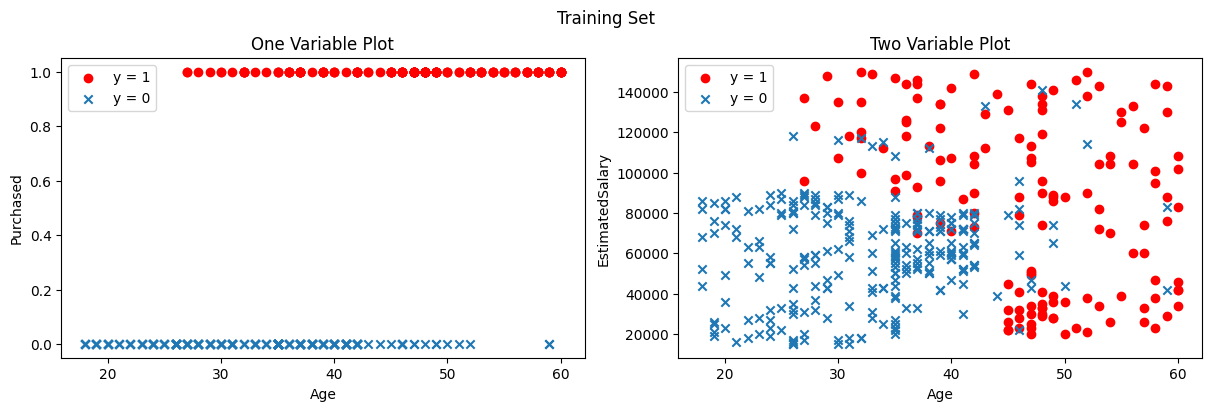

In [3]:
pos = y_train == 1
neg = y_train == 0

fig, ax = plt.subplots(1, n, figsize = (12, 4), constrained_layout = True)

ax[0].scatter(X_train[pos, 0], y_train[pos], marker = 'o', color = 'r', label = 'y = 1')
ax[0].scatter(X_train[neg, 0], y_train[neg], marker = 'x', label = 'y = 0')
ax[0].set_xlabel(features[0])
ax[0].set_ylabel(target)
ax[0].set_title('One Variable Plot')
ax[0].legend()

ax[1].scatter(X_train[pos, 0], X_train[pos, 1], marker = 'o', color = 'r', label = 'y = 1')
ax[1].scatter(X_train[neg, 0], X_train[neg, 1], marker = 'x', label = 'y = 0')
ax[1].set_xlabel(features[0])
ax[1].set_ylabel(features[1])
ax[1].set_title('Two Variable Plot')
ax[1].legend()

plt.suptitle('Training Set')
plt.savefig('figures/01.png')
plt.show()

## Try Linear Regression

In [4]:
w_in = np.zeros((n,))
b_in = 0.
iterations = 1000
alpha = 0.01

In [5]:
scaler = StandardScaler()
X_norm = scaler.fit_transform(X_train)
mu = scaler.mean_
sigma = np.sqrt(scaler.var_)

sgdr = SGDRegressor(max_iter = iterations, alpha = alpha)
sgdr.fit(X_norm, y_train, w_in, b_in)
w_norm = sgdr.coef_
b_norm = sgdr.intercept_

In [6]:
w_raw = w_norm / sigma
b_raw = b_norm - np.dot(w_norm, mu / sigma)

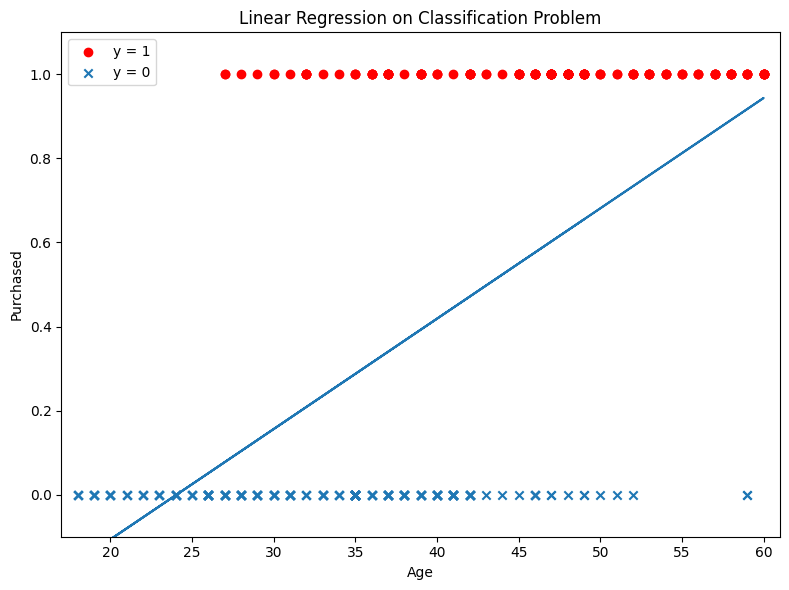

In [7]:
xlim_l, xlim_u = np.min(X_train[:, 0]) - 1, np.max(X_train[:, 0]) + 1
ylim_l, ylim_u = -0.1, 1.1

plt.figure(figsize=(8, 6))
plt.scatter(X_train[pos, 0], y_train[pos], marker = 'o', color = 'r', label = 'y = 1')
plt.scatter(X_train[neg, 0], y_train[neg], marker = 'x', label = 'y = 0')
plt.plot(X_train[:, 0], [w_raw[0] * x0 + w_raw[1] * np.mean(X_train[:, 1]) + b_raw[0] for x0 in X_train[:, 0]])
plt.xlim(xlim_l, xlim_u)
plt.ylim(ylim_l, ylim_u)
plt.xlabel(features[0])
plt.ylabel(target)
plt.title('Linear Regression on Classification Problem')

plt.legend()
plt.tight_layout()
plt.savefig('figures/02.png')
plt.show()

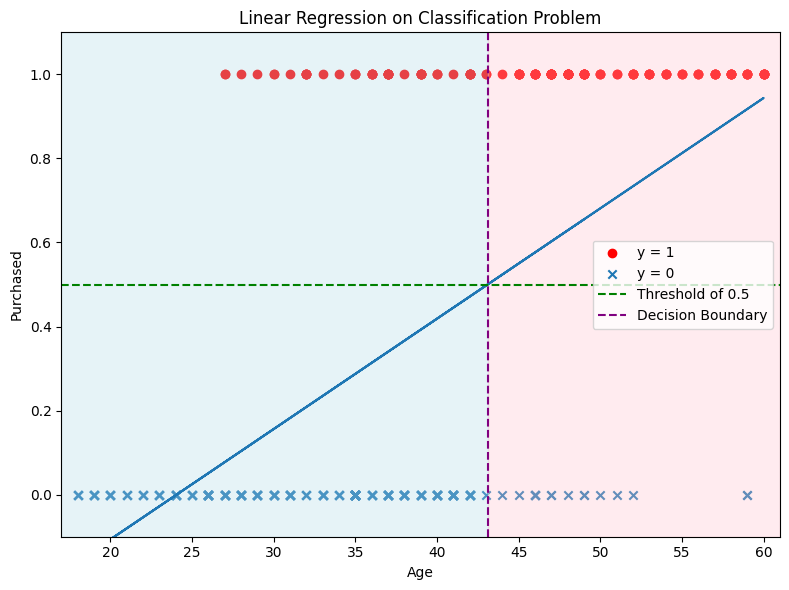

In [8]:
threshold = 0.5
decision_boundary = (threshold - (w_raw[1] * np.mean(X_train[:, 1]) + b_raw[0])) / w_raw[0]

plt.figure(figsize=(8, 6))
plt.scatter(X_train[pos, 0], y_train[pos], marker = 'o', color = 'r', label = 'y = 1')
plt.scatter(X_train[neg, 0], y_train[neg], marker = 'x', label = 'y = 0')
plt.plot(X_train[:, 0], [w_raw[0] * x0 + w_raw[1] * np.mean(X_train[:, 1]) + b_raw[0] for x0 in X_train[:, 0]])
plt.xlim(xlim_l, xlim_u)
plt.ylim(ylim_l, ylim_u)
plt.xlabel(features[0])
plt.ylabel(target)
plt.title('Linear Regression on Classification Problem')

plt.axhline(y = threshold, color = 'green', linestyle = '--', label = 'Threshold of {}'.format(threshold))
plt.axvline(x = decision_boundary, color = 'purple', linestyle = '--', label = 'Decision Boundary')
plt.fill_betweenx([ylim_l, ylim_u], xlim_l, decision_boundary, color = 'lightblue', alpha = 0.3)
plt.fill_betweenx([ylim_l, ylim_u], decision_boundary, xlim_u, color = 'pink', alpha = 0.3)

plt.legend()
plt.tight_layout()
plt.savefig('figures/02_threshold{}.png'.format(threshold))
plt.show()

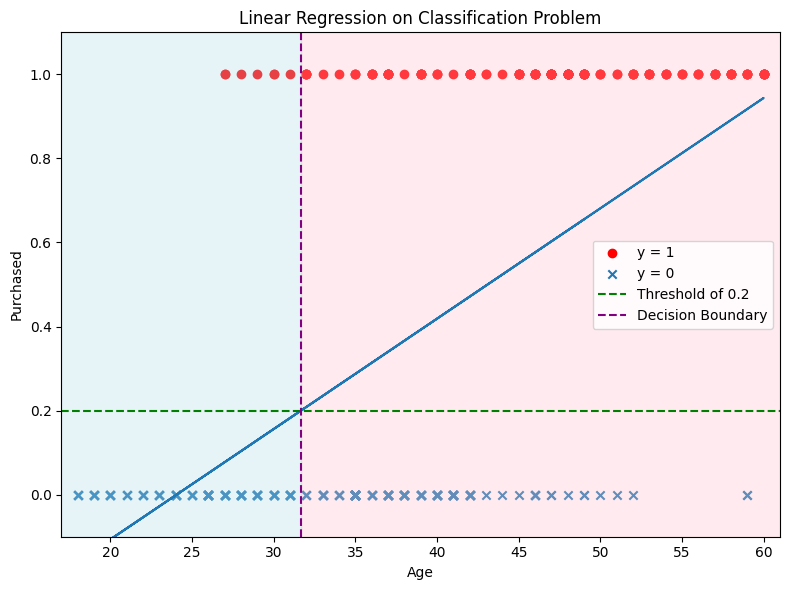

In [9]:
threshold = 0.2
decision_boundary = (threshold - (w_raw[1] * np.mean(X_train[:, 1]) + b_raw[0])) / w_raw[0]

xlim_l, xlim_u = np.min(X_train[:, 0]) - 1, np.max(X_train[:, 0]) + 1
ylim_l, ylim_u = -0.1, 1.1

plt.figure(figsize=(8, 6))
plt.scatter(X_train[pos, 0], y_train[pos], marker = 'o', color = 'r', label = 'y = 1')
plt.scatter(X_train[neg, 0], y_train[neg], marker = 'x', label = 'y = 0')
plt.plot(X_train[:, 0], [w_raw[0] * x0 + w_raw[1] * np.mean(X_train[:, 1]) + b_raw[0] for x0 in X_train[:, 0]])
plt.xlim(xlim_l, xlim_u)
plt.ylim(ylim_l, ylim_u)
plt.xlabel(features[0])
plt.ylabel(target)
plt.title('Linear Regression on Classification Problem')

plt.axhline(y = threshold, color = 'green', linestyle = '--', label = 'Threshold of {}'.format(threshold))
plt.axvline(x = decision_boundary, color = 'purple', linestyle = '--', label = 'Decision Boundary')
plt.fill_betweenx([ylim_l, ylim_u], xlim_l, decision_boundary, color = 'lightblue', alpha = 0.3)
plt.fill_betweenx([ylim_l, ylim_u], decision_boundary, xlim_u, color = 'pink', alpha = 0.3)

plt.legend()
plt.tight_layout()
plt.savefig('figures/02_threshold{}.png'.format(threshold))
plt.show()

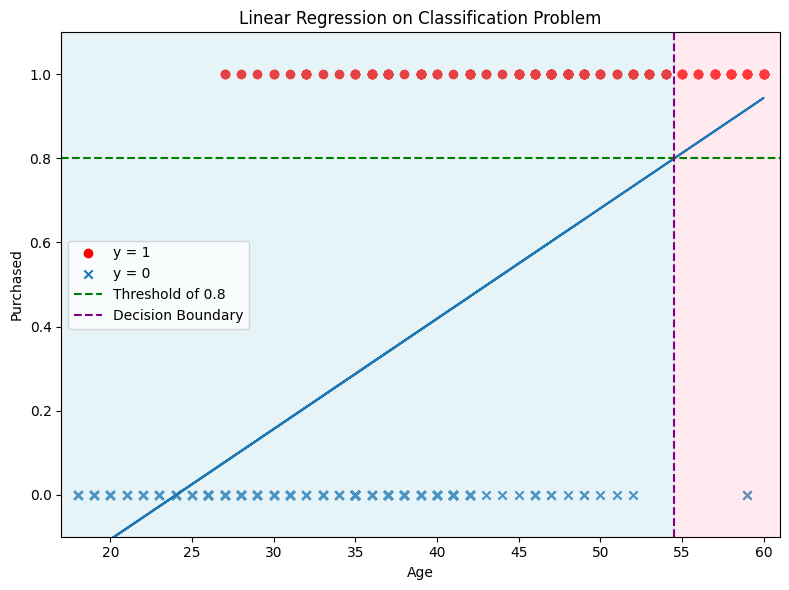

In [10]:
threshold = 0.8
decision_boundary = (threshold - (w_raw[1] * np.mean(X_train[:, 1]) + b_raw[0])) / w_raw[0]

xlim_l, xlim_u = np.min(X_train[:, 0]) - 1, np.max(X_train[:, 0]) + 1
ylim_l, ylim_u = -0.1, 1.1

plt.figure(figsize=(8, 6))
plt.scatter(X_train[pos, 0], y_train[pos], marker = 'o', color = 'r', label = 'y = 1')
plt.scatter(X_train[neg, 0], y_train[neg], marker = 'x', label = 'y = 0')
plt.plot(X_train[:, 0], [w_raw[0] * x0 + w_raw[1] * np.mean(X_train[:, 1]) + b_raw[0] for x0 in X_train[:, 0]])
plt.xlim(xlim_l, xlim_u)
plt.ylim(ylim_l, ylim_u)
plt.xlabel(features[0])
plt.ylabel(target)
plt.title('Linear Regression on Classification Problem')

plt.axhline(y = threshold, color = 'green', linestyle = '--', label = 'Threshold of {}'.format(threshold))
plt.axvline(x = decision_boundary, color = 'purple', linestyle = '--', label = 'Decision Boundary')
plt.fill_betweenx([ylim_l, ylim_u], xlim_l, decision_boundary, color = 'lightblue', alpha = 0.3)
plt.fill_betweenx([ylim_l, ylim_u], decision_boundary, xlim_u, color = 'pink', alpha = 0.3)

plt.legend()
plt.tight_layout()
plt.savefig('figures/02_threshold{}.png'.format(threshold))
plt.show()

## Why Squared Error Cost Function is not Suitable

In [11]:
# Define Functions for Comparison
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def squared_error_cost_function(X, y, w, b):
    m = len(y)
    h = sigmoid(X @ w + b)
    cost = (1 / (2 * m)) * np.sum((h - y) ** 2)
    return cost

def logistic_loss_cost_function(X, y, w, b):
    m = len(y)
    h = sigmoid(X @ w + b)
    h = np.clip(h, 1e-10, 1 - 1e-10)
    cost = (-1 / m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
    return cost

In [12]:
# Generate and Fit Logistic Regression Model
lr_model = LogisticRegression(
    max_iter = 1000
)

lr_model.fit(X_train, y_train)
w_log = lr_model.coef_
b_log = lr_model.intercept_
print(w_log, b_log)

[[2.33332955e-01 3.58841017e-05]] [-12.42645579]


In [13]:
# Generate Grids for 3d plot
b_grid = np.linspace(-10, 10, 100)
w0_grid = np.linspace(-10, 10, 100)
w1_grid = np.linspace(-10, 10, 100)

J_squared_error = np.zeros((len(b_grid), len(w0_grid), len(w1_grid)))
for i in range(len(b_grid)):
    for j in range(len(w0_grid)):
        for k in range(len(w1_grid)):
            # Create the weight vector for the current combination
            w_tmp = np.array([w0_grid[j], w1_grid[k]])
            b_tmp = b_grid[i]
            # Compute the cost for the current b and w
            J_squared_error[i, j, k] = squared_error_cost_function(X_norm, y_train, w_tmp, b_tmp)

J_logistic_loss = np.zeros((len(b_grid), len(w0_grid), len(w1_grid)))
for i in range(len(b_grid)):
    for j in range(len(w0_grid)):
        for k in range(len(w1_grid)):
            # Create the weight vector for the current combination
            w_tmp = np.array([w0_grid[j], w1_grid[k]])
            b_tmp = b_grid[i]
            # Compute the cost for the current b and w
            J_logistic_loss[i, j, k] = logistic_loss_cost_function(X_norm, y_train, w_tmp, b_tmp)


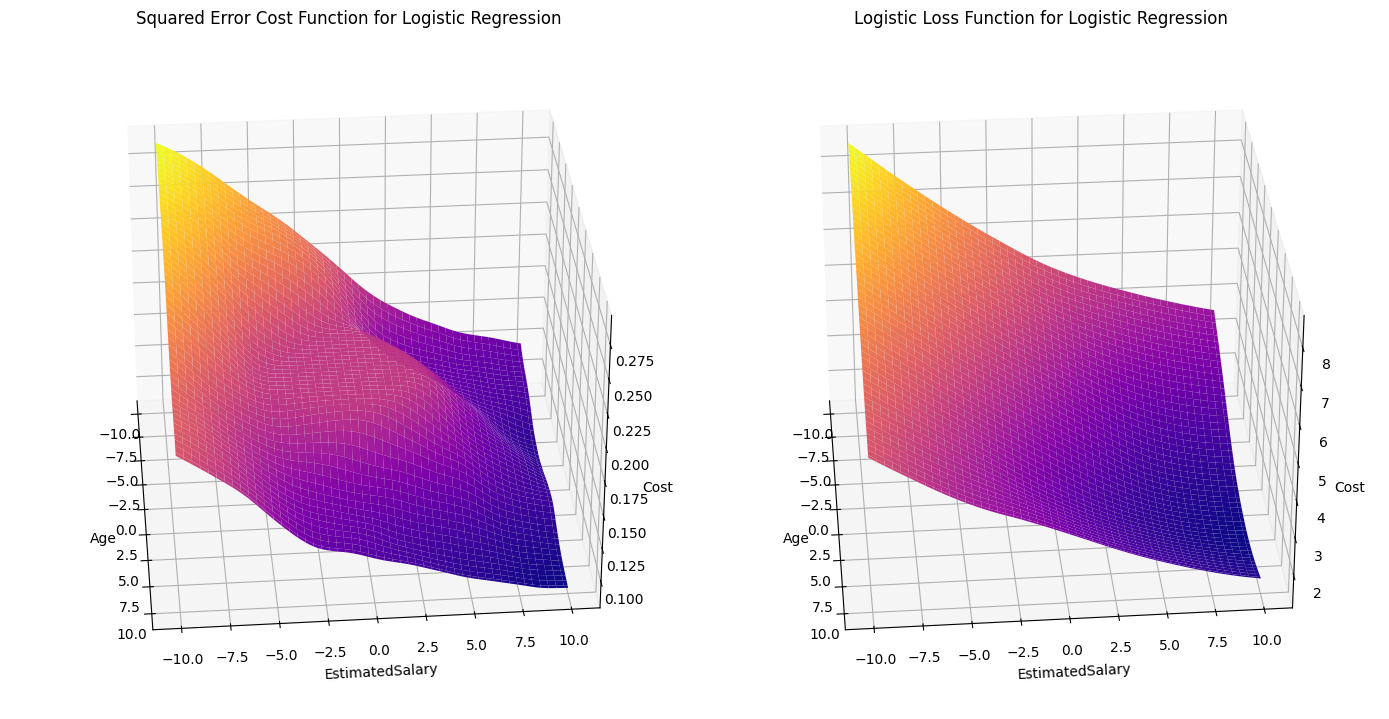

In [14]:
# Draw Cost Surface of w0 w1
b_index = 0  # Arbitrary fixed index for w2 to visualize in 3D
w0_vals, w1_vals = np.meshgrid(w0_grid, w1_grid)
fig = plt.figure(figsize = (14, 8))
ax0 = fig.add_subplot(121, projection='3d')
ax0.plot_surface(w0_vals, w1_vals, J_squared_error[b_index, :, :], cmap='plasma')
ax0.set_xlabel(features[0])
ax0.set_ylabel(features[1])
ax0.set_zlabel('Cost')
ax0.set_title('Squared Error Cost Function for Logistic Regression')

ax1 = fig.add_subplot(122, projection='3d')
ax1.plot_surface(w0_vals, w1_vals, J_logistic_loss[b_index, :, :], cmap='plasma')
ax1.set_xlabel(features[0])
ax1.set_ylabel(features[1])
ax1.set_zlabel('Cost')
ax1.set_title('Logistic Loss Function for Logistic Regression')
plt.tight_layout()

def update(frame):
    ax0.view_init(30, frame)
    ax1.view_init(30, frame)
    return fig,

ani = FuncAnimation(fig, update, frames=np.arange(0, 360, 5), interval=30)

ani.save('figures/03_w0w1.gif', writer='pillow', fps=15)
plt.show()

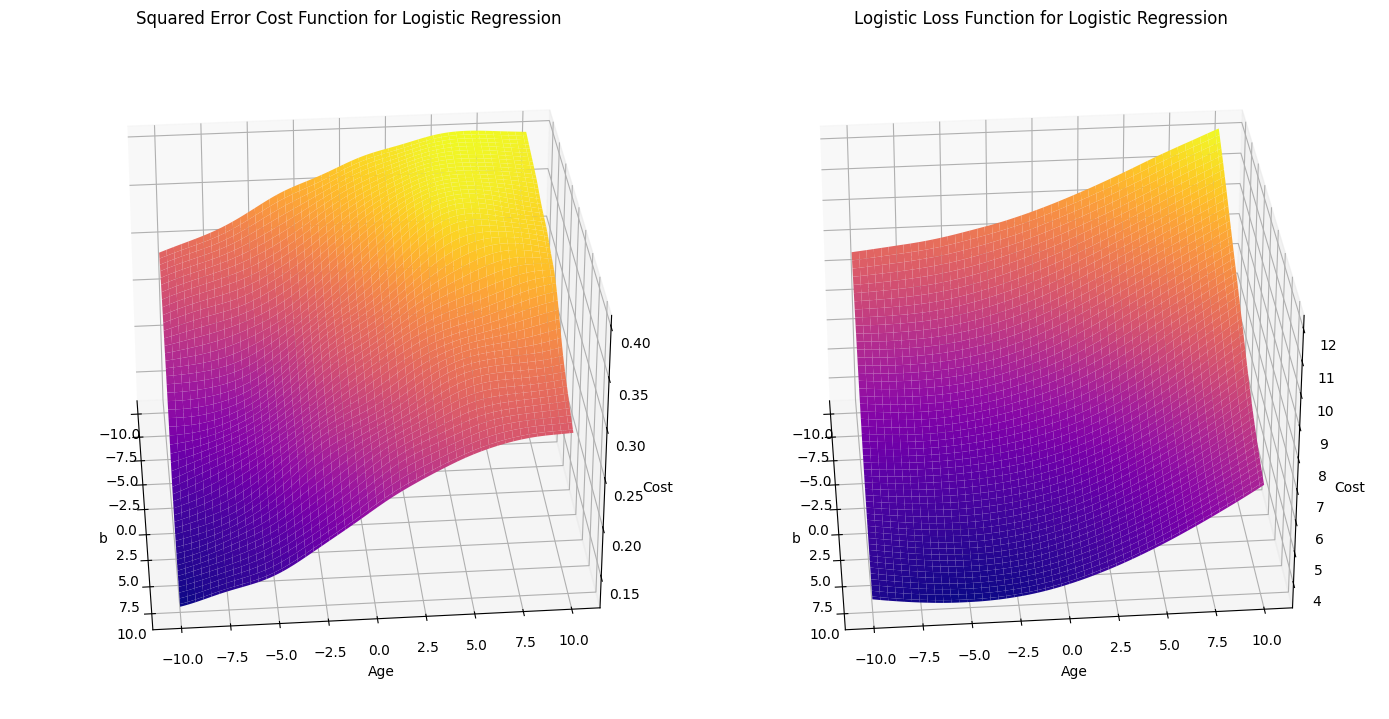

In [15]:
# Draw Cost Surface pf w0 b
w1_index = 0  # Arbitrary fixed index for w2 to visualize in 3D
b_vals, w0_vals = np.meshgrid(b_grid, w0_grid)
fig = plt.figure(figsize = (14, 8))
ax0 = fig.add_subplot(121, projection='3d')
ax0.plot_surface(b_vals, w0_vals, J_squared_error[:, :, w1_index], cmap='plasma')
ax0.set_xlabel('b')
ax0.set_ylabel(features[0])
ax0.set_zlabel('Cost')
ax0.set_title('Squared Error Cost Function for Logistic Regression')

ax1 = fig.add_subplot(122, projection='3d')
ax1.plot_surface(b_vals, w0_vals, J_logistic_loss[:, :, w1_index], cmap='plasma')
ax1.set_xlabel('b')
ax1.set_ylabel(features[0])
ax1.set_zlabel('Cost')
ax1.set_title('Logistic Loss Function for Logistic Regression')
plt.tight_layout()

def update(frame):
    ax0.view_init(30, frame)
    ax1.view_init(30, frame)
    return fig,

ani = FuncAnimation(fig, update, frames=np.arange(0, 360, 5), interval=30)

ani.save('figures/03_bw0.gif', writer='pillow', fps=15)
plt.show()

## 2D Slices of Cost Surfaces

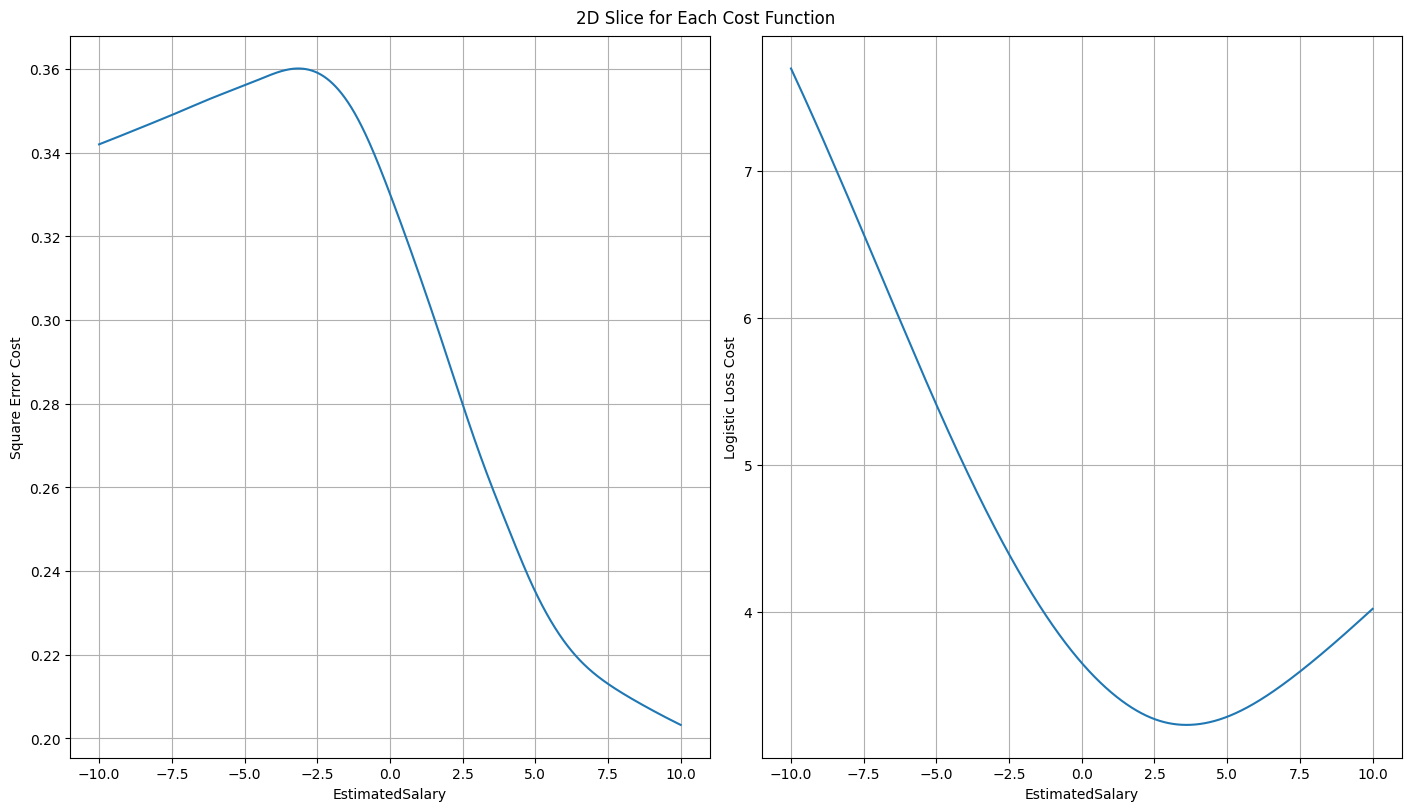

In [16]:
b_fixed = 0
w0_fixed = -5 # 이 숫자 바꿔가면서 체크

grid_detailed = np.linspace(-10, 10, 10000)
squared_costs = []
for w1 in grid_detailed:
    w = np.array([w0_fixed, w1])
    cost = squared_error_cost_function(X_norm, y_train, w, b_fixed)
    squared_costs.append(cost)

logistic_costs = []
for w1 in grid_detailed:
    w = np.array([w0_fixed, w1])
    cost = logistic_loss_cost_function(X_norm, y_train, w, b_fixed)
    logistic_costs.append(cost)

fig, ax = plt.subplots(1, 2, figsize = (14, 8), constrained_layout = True)
ax[0].plot(grid_detailed, squared_costs)
ax[0].set_xlabel(features[1])
ax[0].set_ylabel('Square Error Cost')
ax[0].grid(True)

ax[1].plot(grid_detailed, logistic_costs)
ax[1].set_xlabel(features[1])
ax[1].set_ylabel('Logistic Loss Cost')
ax[1].grid(True)

plt.suptitle('2D Slice for Each Cost Function')
plt.savefig('figures/04.png')
plt.show()